### Customer Churning Project


## **Business Understanding : Predict Customer Churn for Syriatel Telcommunication Company**

### **Background**
SyriaTel, a telecommunications company, provides various services such as mobile, internet, and landline to its customers.
Customer churn, or the rate at which customers cease their relationship with SyriaTel, poses a significant challenge as it directly impacts the company's revenue and profitability.
Identifying and predicting churn patterns is crucial for SyriaTel to proactively address customer attrition, retain valuable customers, and maximize long-term profitability.


### **Objective**
Develop a predictive model that can accurately identify customers at risk of churning from SyriaTel's services.
By predicting churn in advance, SyriaTel can implement targeted retention strategies to mitigate customer attrition, improve customer satisfaction, and enhance overall business performance.

### **Stakeholders**
    -Senior Management
    -Marketing Team
    -Customer Service Reps
    -Investors
    -Communication Regulation Bodies
    -Sales Teams
    -Finance and Accounting Team
    -Product Development Team
    -Social Media Team

### Key Objectives
    What factors contribute to customer churn within SyriaTel's customer base?
    Are there identifiable patterns or trends in customer behavior that precede churn?
    How accurately can we predict which customers are likely to churn in the near future?
    What proactive measures can SyriaTel take to retain at-risk customers and minimize churn rates?
### Data Description
The dataset in Syriatel encompasses the following features
    State: Customer's state of residence
    Account Length: Number of days with the telecom company
    Area Code: Area code of the customer's phone number
    International Plan: Whether the customer has an international calling plan
    Voice Mail Plan: Whether the customer has a voice mail plan .
    Number of Voicemail Messages: Count of voicemail messages received
    Total Day Minutes: Total minutes used during the daytime
    Total Day Calls: Total number of calls made during the daytime
    Total Day Charge: Total charges for daytime usage
    Total Evening Minutes: Total minutes used during the evening
    Total Evening Calls: Total number of calls made during the evening
    Total Evening Charge: Total charges for evening usage
    Total Night Minutes: Total minutes used during the night
    Total Night Calls: Total number of calls made during the night
    Total Night Charge: Total charges for nighttime usage
    Total International Minutes: Total international minutes used
    Total International Calls: Total international calls made
    Total International Charge: Total charges for international usage
    Customer Service Calls: Number of customer service calls made
    Churn: Indicates whether the customer has churned
### Model Success
The model ability to accurately predict customer churn as measured on perfromance metrics such as accuracy, precision, recall, and F1-score. In addition, compare the model to baseline models and provide actionable insights to impliment customer retention stategies.



In [47]:
# Importing relevant libraries for plotting and visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score, roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Data Exploration & Understanding

In [1]:
data = pd.read_csv("C:\\Users\\USER\\phase3\\phase3\\phase3\\Data Sets\\bigml_59c28831336c6604c800002a.csv")
data


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


### Data Columns

In [49]:
# inspect the data columns
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### Dataset characteristics

In [50]:
# summary of the dataset structure and characteristics
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

### Check duplicate values of the dataset

In [51]:
# check duplicate values in the dataset
data.duplicated().sum()

# There are no duplicates in the dataset

0

### Structure of the data set

In [52]:
# the structure of the data set
data.shape

(3333, 21)

## Statistical summary of the dataset

In [53]:
# inspect the statistical summary of the dataset
data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


## Understand the variables in the dataset

In [54]:
# Understand the dataset variables
data.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

## Check unique values in the dataset

In [55]:
# Check Unique Values for each variable.
unique_values_per_col = data.nunique()
print("Number of Unique Values per Column:")
print(unique_values_per_col)

Number of Unique Values per Column:
state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64


In [56]:
# check unique values in the dataset
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'state': ['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']
Unique values in column 'account length': [128 107 137  84  75 118 121 147 117 141  65  74 168  95  62 161  85  93
  76  73  77 130 111 132 174  57  54  20  49 142 172  12  72  36  78 136
 149  98 135  34 160  64  59 119  97  52  60  10  96  87  81  68 125 116
  38  40  43 113 126 150 138 162  90  50  82 144  46  70  55 106  94 155
  80 104  99 120 108 122 157 103  63 112  41 193  61  92 131 163  91 127
 110 140  83 145  56 151 139   6 115 146 185 148  32  25 179  67  19 170
 164  51 208  53 105  66  86  35  88 123  45 100 215  22  33 114  24 101
 143  48  71 167  89 199 166 158 196 209  16  39 173 129  44  79  31 124
  37 159 194 154  21 133 224  58  11 109 102 165  18  30 176  47 190 152
  26  69

### Check missing values

In [57]:
# Check for missing values in the entire the dataset
missing_values_total = data.isna().sum()

# Check for missing values in each column
missing_values_per_column = data.isna().sum(axis=0)

# Check for missing values in each row
missing_values_per_row = data.isna().sum(axis=1)

print("Missing values in the entire dataset:")
print(missing_values_total)

print("\nMissing values in each column:")
print(missing_values_per_column)

print("\nMissing values in each row:")
print(missing_values_per_row)


Missing values in the entire dataset:
state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

Missing values in each column:
state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls      

### Distribution of the data in the dataset

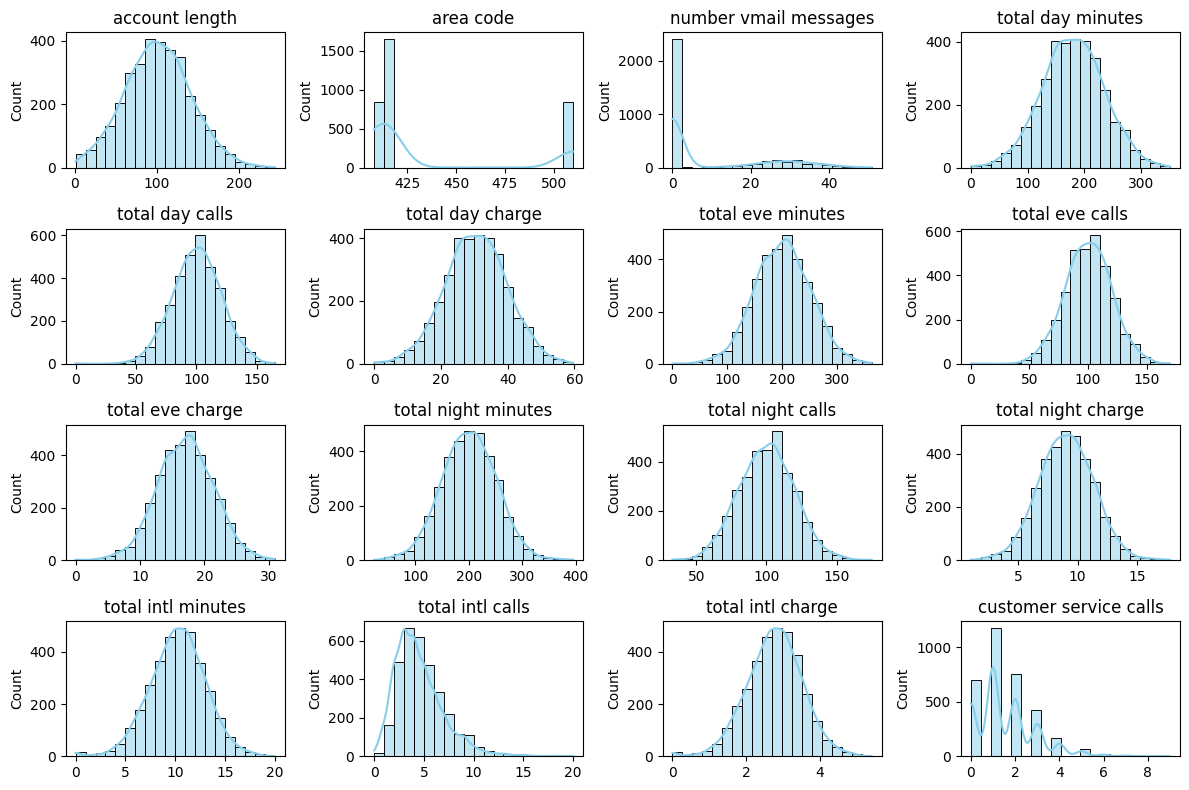

In [58]:
# distribution of variables in the dataset
# Columns in the dataset
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms for numerical variables
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(data[column], kde=True, color='skyblue', bins=20)
    plt.title(column)
    plt.xlabel('')
plt.tight_layout()
plt.show()

In [59]:
# Drop unnecessary columns
data = data.drop(columns=[ "phone number"])
#data


### Scatterplots Numerical variables vs Churn

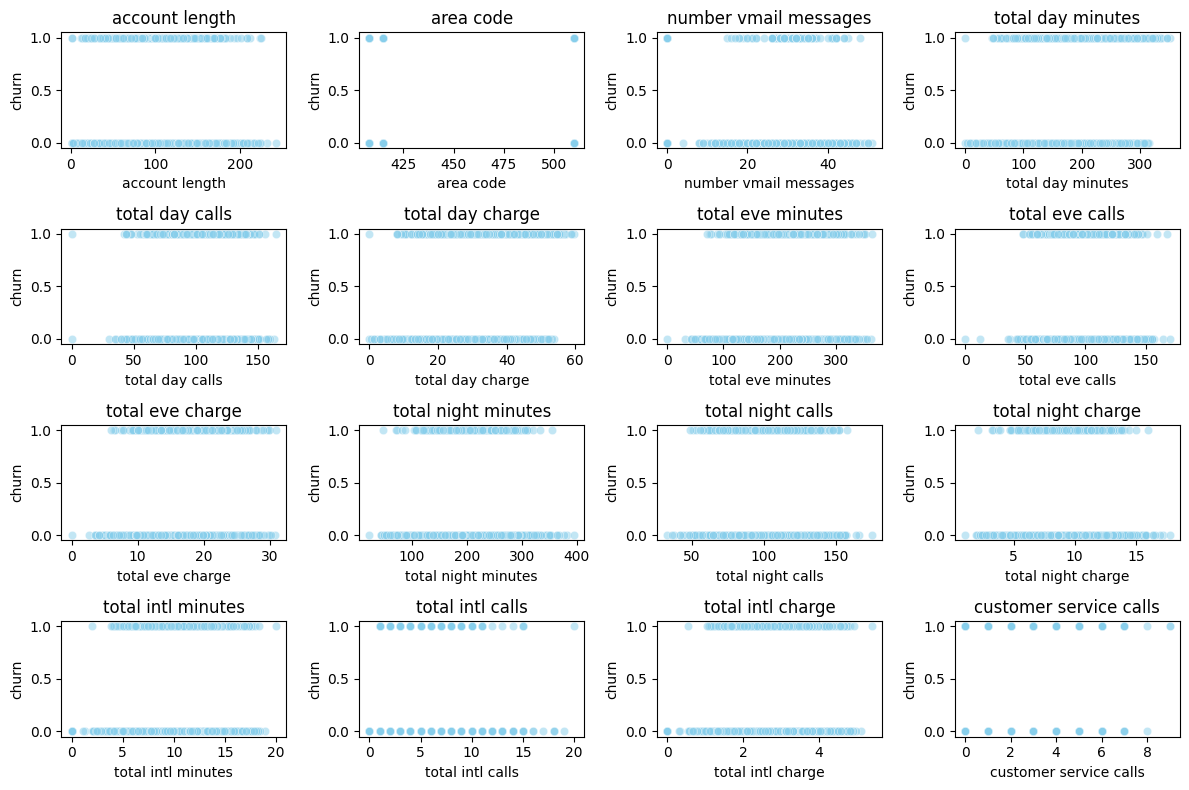

In [60]:
# Scatter plots for numerical variables vs. churn
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)
    sns.scatterplot(x=column, y='churn', data=data, color='skyblue', alpha=0.5)
    plt.title(column)
plt.tight_layout()
plt.show()

In [61]:
#data = pd.get_dummies(data, columns=[ "international plan", "voice mail plan"], drop_first=True)

## Converting Categorical to numerical data

Using data label encoder

In [62]:
# convert categorical data to numerical for machine learning to process them as numerical data
# use label encoding to transform categorical data
label_encoder = LabelEncoder()

data['international plan'] = label_encoder.fit_transform(data['international plan'])

# Label encoding 'voice mail plan'
data['voice mail plan'] = label_encoder.fit_transform(data['voice mail plan'])

# Label encoding "state"
data['state'] = label_encoder.fit_transform(data['state'])

# decode international plan
decoded_international_plan = label_encoder.inverse_transform(data['international plan'])

# decode voice mail plan
decoded_voice_mail_plan = label_encoder.inverse_transform(data['voice mail plan'])

# decode state
decoded_voice_mail_plan = label_encoder.inverse_transform(data['state'])


## Correlation of variables in the dataset

In [63]:
# correlation of the dataset
data.corr()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
state,1.000000,0.003678,0.015814,-0.004597,-0.031664,-0.027762,-0.006737,-0.000764,-0.006736,0.013682,-0.016268,0.013674,0.024576,0.007458,0.024572,-0.007834,0.013967,-0.007819,-0.025861,0.007780
account length,0.003678,1.000000,-0.012463,0.024735,0.002918,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
area code,0.015814,-0.012463,1.000000,0.048551,-0.000747,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
international plan,-0.004597,0.024735,0.048551,1.000000,0.006006,0.008745,0.049396,0.003755,0.049398,0.019100,0.006114,0.019106,-0.028905,0.012451,-0.028913,0.045871,0.017366,0.045780,-0.024522,0.259852
voice mail plan,-0.031664,0.002918,-0.000747,0.006006,1.000000,0.956927,-0.001684,-0.011086,-0.001686,0.021545,-0.006444,0.021559,0.006079,0.015553,0.006064,-0.001318,0.007618,-0.001276,-0.017824,-0.102148
number vmail messages,-0.027762,-0.004628,-0.001994,0.008745,0.956927,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
total day minutes,-0.006737,0.006216,-0.008264,0.049396,-0.001684,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
total day calls,-0.000764,0.038470,-0.009646,0.003755,-0.011086,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
total day charge,-0.006736,0.006214,-0.008264,0.049398,-0.001686,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
total eve minutes,0.013682,-0.006757,0.003580,0.019100,0.021545,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796


## Heatmap Visuals
Correlation of variables in the dataset

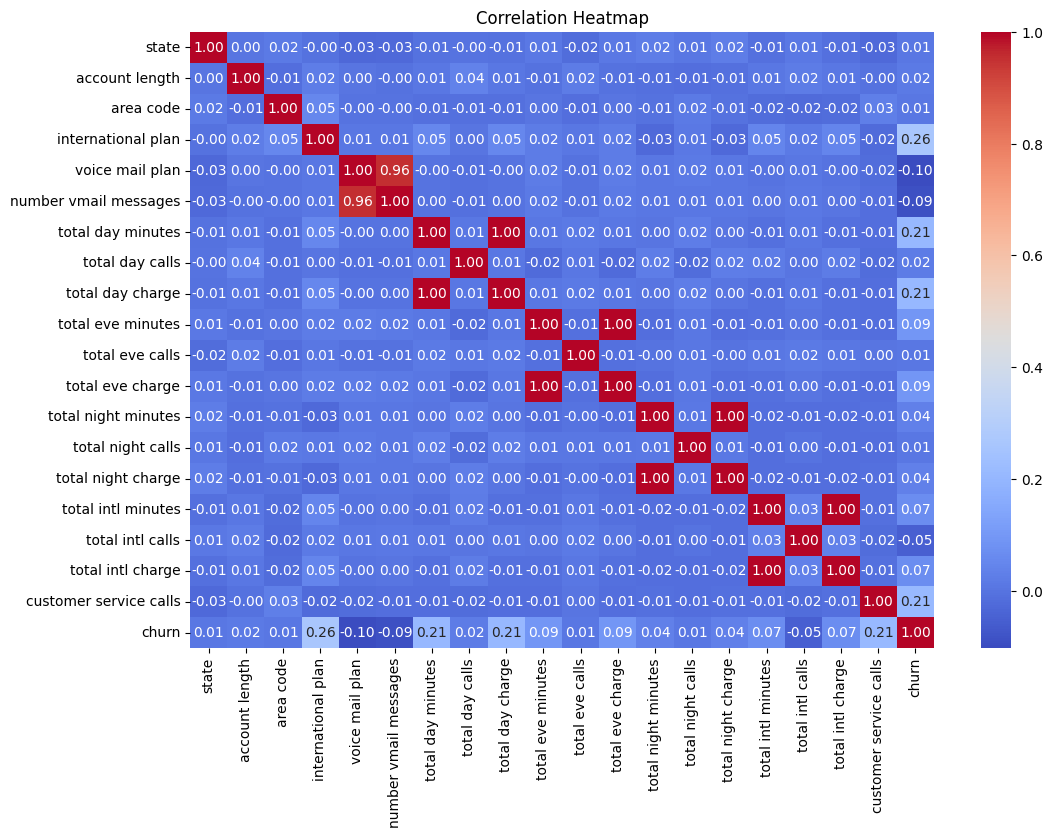

In [64]:
# Create a heatmap to visualise the correlation of the variables
plt.figure(figsize=(12, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## Scatterplot

Relationship of high correlation variables in the dataset

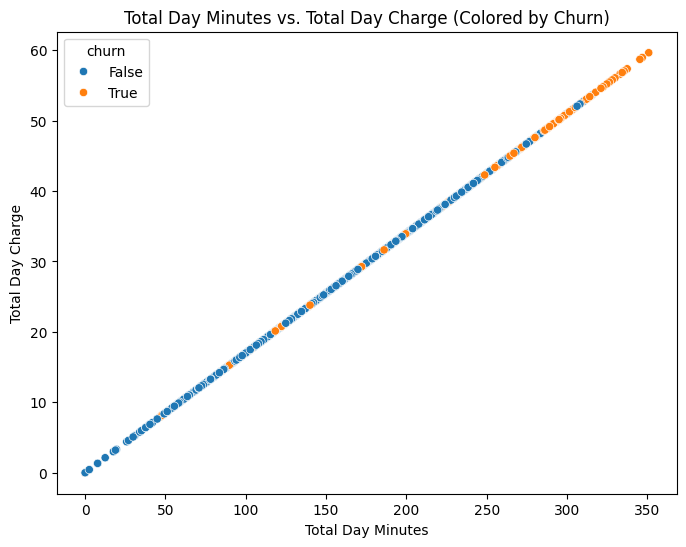

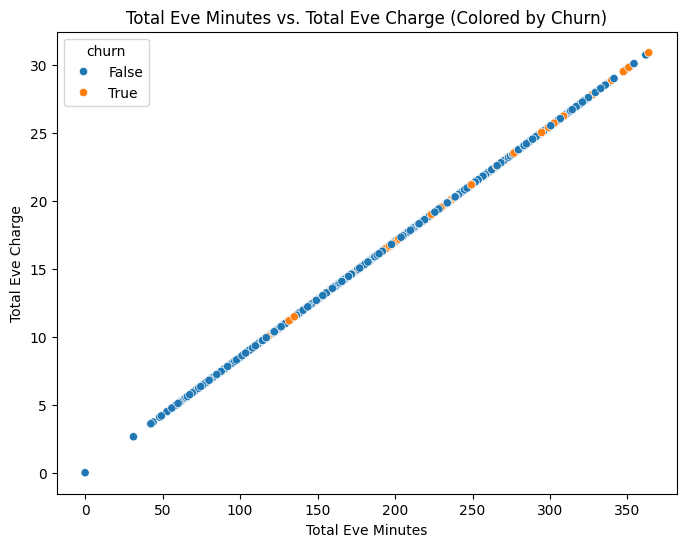

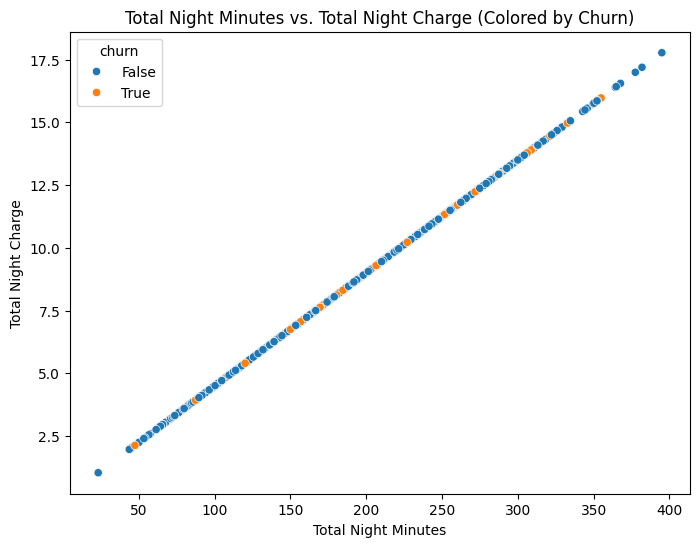

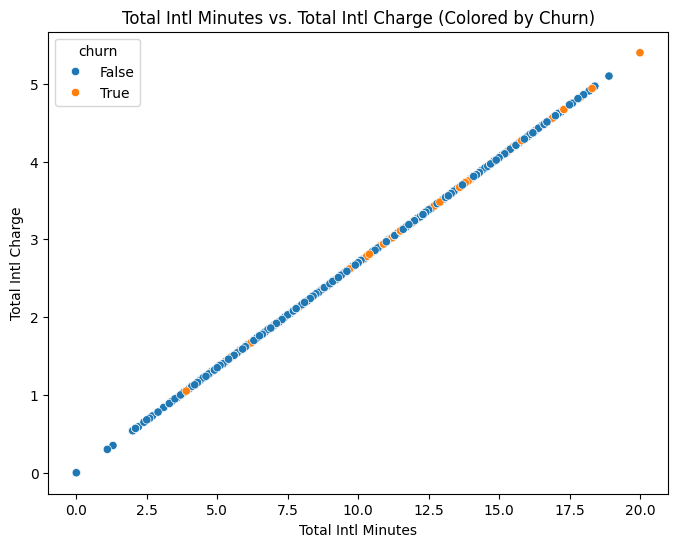

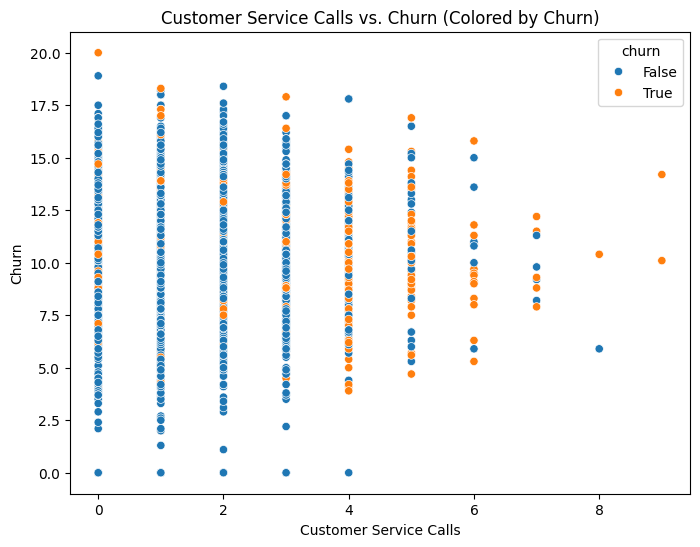

In [65]:
# Scatterplot: Total Day Minutes vs. Total Day Charge with hue of churn
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total day minutes', y='total day charge', hue='churn', data=data)
plt.title('Total Day Minutes vs. Total Day Charge (Colored by Churn)')
plt.xlabel('Total Day Minutes')
plt.ylabel('Total Day Charge')
plt.show()

# Scatterplot: Total Eve Minutes vs. Total Eve Charge with hue of churn
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total eve minutes', y='total eve charge', hue='churn', data=data)
plt.title('Total Eve Minutes vs. Total Eve Charge (Colored by Churn)')
plt.xlabel('Total Eve Minutes')
plt.ylabel('Total Eve Charge')
plt.show()

# Scatterplot: Total Night Minutes vs. Total Night Charge with hue of churn
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total night minutes', y='total night charge', hue='churn', data=data)
plt.title('Total Night Minutes vs. Total Night Charge (Colored by Churn)')
plt.xlabel('Total Night Minutes')
plt.ylabel('Total Night Charge')
plt.show()

# Scatterplot: Total Intl Minutes vs. Total Intl Charge with hue of churn
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total intl minutes', y='total intl charge', hue='churn', data=data)
plt.title('Total Intl Minutes vs. Total Intl Charge (Colored by Churn)')
plt.xlabel('Total Intl Minutes')
plt.ylabel('Total Intl Charge')
plt.show()

# Scatterplot: Customer Service Calls vs. Churn with hue of churn
plt.figure(figsize=(8, 6))
sns.scatterplot(x='customer service calls', y="total intl minutes", hue='churn', data=data)
plt.title('Customer Service Calls vs. Churn (Colored by Churn)')
plt.xlabel('Customer Service Calls')
plt.ylabel('Churn')
plt.show()


## Histogram Visualisation

Check the distriution of variables with high correlation with churn

In [66]:
# distribution of total day charge and churn status
fig = px.histogram(data, x="total day charge", color="churn",
                   title="Distribution of Total day Charge by Churn Status")
fig.show()

In [67]:
# distribution of total int charge verse vi churn
fig = px.histogram(data, x="total intl charge", color="churn",
                   title="Distribution of Total Intl Charge by Churn Status")
fig.show()

In [68]:
# distribution of customer service calls and churn
fig = px.histogram(data, x="customer service calls", color="churn",
                   title="Distribution of customer service calls by Churn Status")
fig.show()

In [69]:
# distribution of total eve change and churn
fig = px.histogram(data, x="total eve charge", color="churn",
                   title="Distribution of total eve charge by Churn Status")
fig.show()

In [70]:
# distribution of international plan and churn
fig = px.histogram(data, x="international plan", color="churn",
                   title="Distribution of International Plan with Color Encoding by Churn Status",
                   labels={"international plan": "International Plan", "churn": "Churn Status"})
fig.update_xaxes(type='category')  # Ensure 'international plan' is treated as a categorical variable
fig.show()

In [71]:
# distribution of the target variable
fig = px.histogram(data, x="churn", color="churn",
                   title="Distribution of Churn Status")
fig.show()


In [72]:
 # characterisitcs of the dataset
 data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   int64  
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   international plan      3333 non-null   int64  
 4   voice mail plan         3333 non-null   int64  
 5   number vmail messages   3333 non-null   int64  
 6   total day minutes       3333 non-null   float64
 7   total day calls         3333 non-null   int64  
 8   total day charge        3333 non-null   float64
 9   total eve minutes       3333 non-null   float64
 10  total eve calls         3333 non-null   int64  
 11  total eve charge        3333 non-null   float64
 12  total night minutes     3333 non-null   float64
 13  total night calls       3333 non-null   int64  
 14  total night charge      3333 non-null   

### Data Processing

In [73]:

#data = pd.get_dummies(data, columns=[ "international plan", "voice mail plan", "churn","state"], drop_first=True)
#data

In [74]:
# check number counts of the values in the columns
for columns in data.columns:
    print(columns,'\n', data[columns].value_counts()/len(data))

state 
 49    0.031803
23    0.025203
34    0.024902
1     0.024002
48    0.023402
35    0.023402
37    0.023402
50    0.023102
45    0.023102
6     0.022202
22    0.021902
13    0.021902
46    0.021902
43    0.021602
44    0.021602
15    0.021302
20    0.021002
16    0.021002
27    0.020402
31    0.020402
26    0.020402
5     0.019802
33    0.019802
47    0.019802
39    0.019502
19    0.019502
25    0.019502
3     0.019202
9     0.018902
24    0.018902
32    0.018602
21    0.018602
28    0.018602
29    0.018302
36    0.018302
8     0.018302
40    0.018002
41    0.018002
17    0.017702
14    0.017402
30    0.016802
2     0.016502
10    0.016202
7     0.016202
11    0.015902
42    0.015902
0     0.015602
18    0.015302
38    0.013501
12    0.013201
4     0.010201
Name: state, dtype: float64
account length 
 105    0.012901
87     0.012601
101    0.012001
93     0.012001
90     0.011701
         ...   
243    0.000300
200    0.000300
232    0.000300
5      0.000300
221    0.000300
Name: 

##### There is data imbalances as displayed in area code, number of vmail messages, customer service calls, and the states

## Data Processing

In [75]:
## normalize the numerical variables
# use the converted categorical data
# handle imabalanced data as the data distribution is skewed

In [76]:
# X predictors (all other columns) and y - targeted variable as churn
X = data.drop(columns=['churn'], axis=1)
y = data['churn']
data['churn'] = data['churn'].astype(int)

# Random selection method
# Split the data into training and testing sets with a 75-25 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [77]:
# checking features data separating the X predictor from the targeted variable churn
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   int64  
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   international plan      3333 non-null   int64  
 4   voice mail plan         3333 non-null   int64  
 5   number vmail messages   3333 non-null   int64  
 6   total day minutes       3333 non-null   float64
 7   total day calls         3333 non-null   int64  
 8   total day charge        3333 non-null   float64
 9   total eve minutes       3333 non-null   float64
 10  total eve calls         3333 non-null   int64  
 11  total eve charge        3333 non-null   float64
 12  total night minutes     3333 non-null   float64
 13  total night calls       3333 non-null   int64  
 14  total night charge      3333 non-null   

In [78]:
# stardardize the data features using StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical features in X
X  = scaler.fit_transform(X)

In [79]:
# view scaled data features columns arrays
X

array([[-0.6786493 ,  0.67648946, -0.52360328, ..., -0.60119509,
        -0.0856905 , -0.42793202],
       [ 0.6031696 ,  0.14906505, -0.52360328, ..., -0.60119509,
         1.2411686 , -0.42793202],
       [ 0.33331299,  0.9025285 , -0.52360328, ...,  0.21153386,
         0.69715637, -1.1882185 ],
       ...,
       [ 0.87302621, -1.83505538,  1.71881732, ...,  0.61789834,
         1.3871231 ,  0.33235445],
       [-1.35329082,  2.08295458,  1.71881732, ...,  2.24335625,
        -1.87695028,  0.33235445],
       [ 1.07541867, -0.67974475, -0.52360328, ..., -0.19483061,
         1.2411686 , -1.1882185 ]])

The values in each column are standardized, meaning they have been transformed to have a mean of 0 and a standard deviation of 1. This standardization process helps in bringing all features to the same scale, which is important for many machine learning algorithms

## Data Balancing

In [80]:
# SMOTE to reduce class class imbalance
smote = SMOTE(random_state=42)
# Fit SMOTE to training data and generate samples
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
# show class distribution
print(pd.Series(y_train_resampled).value_counts())

False    2141
True     2141
Name: churn, dtype: int64


This balanced output suggests that you now have 2141 samples for each class, which can contribute to a more robust and reliable model. Balanced classes can lead to more accurate and fair model predictions, particularly in scenarios where the classes are imbalanced.

## Building Models

### Gradient Boosting Classifier

Accuracy: 0.9316546762589928
Precision: 0.7615384615384615
Recall: 0.792
F1-score: 0.7764705882352941
ROC-AUC Score: 0.9226064880112834
              precision    recall  f1-score   support

       False       0.96      0.96      0.96       709
        True       0.76      0.79      0.78       125

    accuracy                           0.93       834
   macro avg       0.86      0.87      0.87       834
weighted avg       0.93      0.93      0.93       834



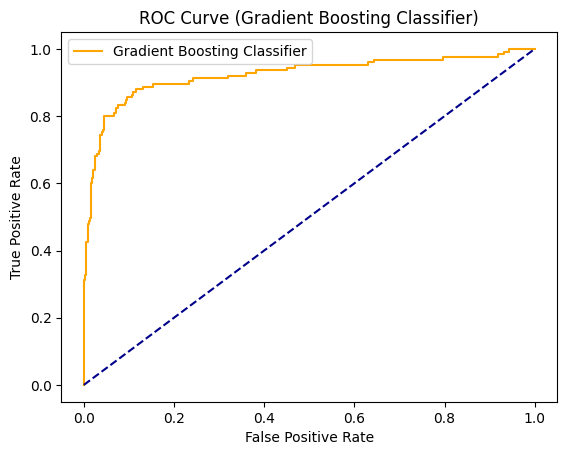

In [81]:
# Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# fitting model for the resampled data
gb_classifier.fit(X_train_resampled, y_train_resampled)

# predict test set
y_pred_gb = gb_classifier.predict(X_test)

# Performance metrics: accuracy, precision, recall, F1 score, ROC-AUC score
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Precision:", precision_score(y_test, y_pred_gb))
print("Recall:", recall_score(y_test, y_pred_gb))
print("F1-score:", f1_score(y_test, y_pred_gb))
print("ROC-AUC Score:", roc_auc_score(y_test, gb_classifier.predict_proba(X_test)[:, 1]))

# generate classification report of the model
print(classification_report(y_test, y_pred_gb))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, gb_classifier.predict_proba(X_test)[:, 1])
# plot
plt.plot(fpr, tpr, color='orange', label='Gradient Boosting Classifier')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Gradient Boosting Classifier)')
plt.legend()
plt.show()


Accuracy: The model achieves an accuracy of 93.17%, indicating that it correctly predicts churn and non-churn instances in about 93.17% of cases.
Precision of 76.15%, the model correctly identifies about 76.15% of the predicted churn cases, minimizing false positives. In addition recall approximately 79.2% of all actual churn cases, reflecting its ability to identify a significant portion of true positives.

F1-score: The F1-score, at 77.65% indicates good  performance in predicting customer churn.

The area under the ROC curve is 92.26%, suggesting that the model effectively distinguishes between churn and non-churn instances across different threshold values.

Overall, the model demonstrates strong predictive capabilities for identifying customer churn, with a balanced trade-off between precision and recall.

### Random Forest Classifier

Accuracy: 0.9268585131894485
Precision: 0.7807017543859649
Recall: 0.712
F1-score: 0.7447698744769874
ROC-AUC Score: 0.9146234132581099
              precision    recall  f1-score   support

       False       0.95      0.96      0.96       709
        True       0.78      0.71      0.74       125

    accuracy                           0.93       834
   macro avg       0.87      0.84      0.85       834
weighted avg       0.92      0.93      0.93       834



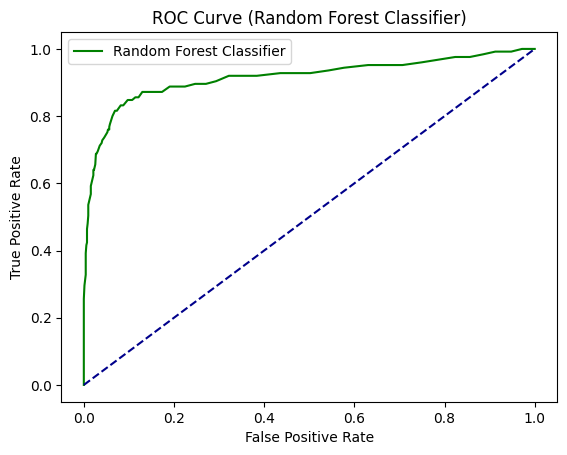

In [82]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the model on resampled data
rf_classifier.fit(X_train_resampled, y_train_resampled)

# predict test set
y_pred_rf = rf_classifier.predict(X_test)

# Performance metrics: accuracy, precision, recall, F1 score, ROC-AUC score
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-score:", f1_score(y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, rf_classifier.predict_proba(X_test)[:, 1]))

# generate classification report of the model
print(classification_report(y_test, y_pred_rf))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, rf_classifier.predict_proba(X_test)[:, 1])
# plot
plt.plot(fpr, tpr, color='green', label='Random Forest Classifier')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Random Forest Classifier)')
plt.legend()
plt.show()


Accuracy: 92.69%
Precision: 78.07%
Recall: 71.2%
F1-score: 74.48%
ROC-AUC Score: 91.46%

ROC-AUC score of 91.46% signifies the model's strong ability to distinguish between churn and non-churn instances
Recall of 71.2% indicates that the model successfully identifies a substantial portion of actual churn
The model shows strong performance in identifying churn, with a good balance between precision and recall.

## SVM Model

Accuracy: 0.8357314148681055
Precision: 0.4594594594594595
Recall: 0.544
F1-score: 0.49816849816849823
ROC-AUC Score: 0.7153963328631876
              precision    recall  f1-score   support

       False       0.92      0.89      0.90       709
        True       0.46      0.54      0.50       125

    accuracy                           0.84       834
   macro avg       0.69      0.72      0.70       834
weighted avg       0.85      0.84      0.84       834



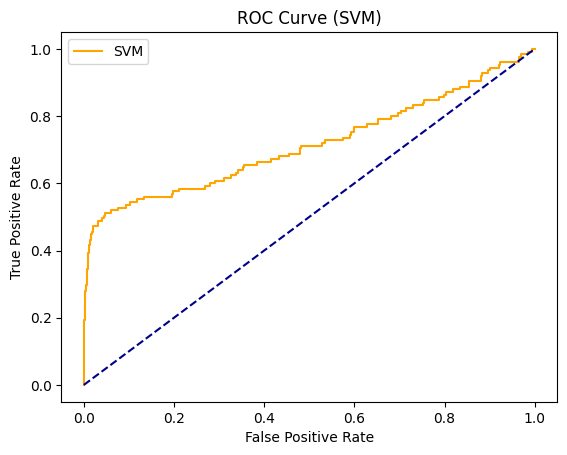

In [83]:
# SVM Classifier
svm_classifier = SVC(random_state=42)

# Fit the model
svm_classifier.fit(X_train_resampled, y_train_resampled)

# Predict test set
y_pred_svm = svm_classifier.predict(X_test)

# Performance metrics: accuracy, precision, recall, F1 score, ROC-AUC score
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))
print("F1-score:", f1_score(y_test, y_pred_svm))
print("ROC-AUC Score:", roc_auc_score(y_test, svm_classifier.decision_function(X_test)))

# generate classification report
print(classification_report(y_test, y_pred_svm))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, svm_classifier.decision_function(X_test))
# plot
plt.plot(fpr, tpr, color='orange', label='SVM')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (SVM)')
plt.legend()
plt.show()



Performance summary

Accuracy: 83.57%
Precision: 45.95%
Recall: 54.4%
F1-score: 49.82%
ROC-AUC Score: 71.54%
Model's performance is moderate, with room for improvement, especially in precision and recall. Model shows potential but could benefit from improvements in both precision and recall for better predictive performance.

### Decision Tree Model

Accuracy: 0.829736211031175
Precision: 0.460093896713615
Recall: 0.784
F1-score: 0.5798816568047337
ROC-AUC Score: 0.8108998589562765
              precision    recall  f1-score   support

       False       0.96      0.84      0.89       709
        True       0.46      0.78      0.58       125

    accuracy                           0.83       834
   macro avg       0.71      0.81      0.74       834
weighted avg       0.88      0.83      0.85       834



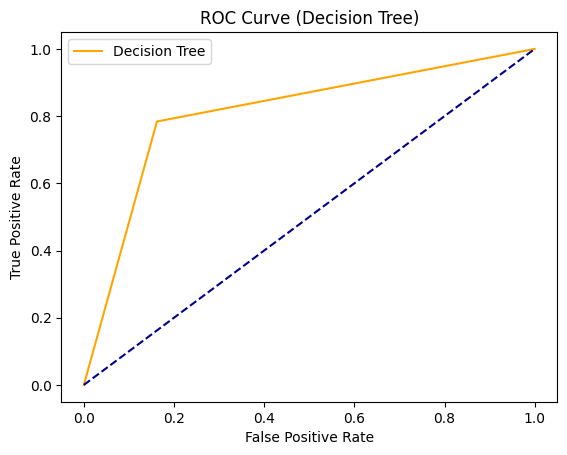

In [84]:
# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the model on training data
dt_classifier.fit(X_train_resampled, y_train_resampled)

# Predict test set
y_pred_dt = dt_classifier.predict(X_test)

# performance metrics, accuracy, precision, recall, F1 score, ROC-AUC score
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1-score:", f1_score(y_test, y_pred_dt))
print("ROC-AUC Score:", roc_auc_score(y_test, dt_classifier.predict_proba(X_test)[:, 1]))

# classification report
print(classification_report(y_test, y_pred_dt))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, dt_classifier.predict_proba(X_test)[:, 1])
# plot
plt.plot(fpr, tpr, color='orange', label='Decision Tree')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Decision Tree)')
plt.legend()
plt.show()


Accuracy: 82.97%
Precision: 46.01%
Recall: 78.4%
F1-score: 57.99%
ROC-AUC Score: 81.09%

Performance is moderate, with relatively high recall but lower precision.

Identifies a significant portion of actual churn cases, it may also misclassify some non-churn instances as churn. Therefore, improving precision  will enhance the model's performance in accurately identifying churners while minimizing false positives





### KNN Classifier

Accuracy: 0.6738609112709832
Precision: 0.25901639344262295
Recall: 0.632
F1-score: 0.3674418604651163
ROC-AUC Score: 0.6819633286318758
              precision    recall  f1-score   support

       False       0.91      0.68      0.78       709
        True       0.26      0.63      0.37       125

    accuracy                           0.67       834
   macro avg       0.59      0.66      0.57       834
weighted avg       0.82      0.67      0.72       834



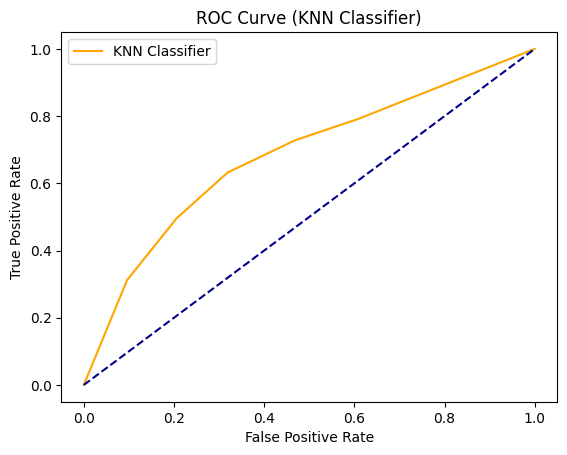

In [85]:
# KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# model fitting on training data
knn_classifier.fit(X_train_resampled, y_train_resampled)

# Predicting test set
y_pred_knn = knn_classifier.predict(X_test)

# Performance metrics: accuracy, precision, recall, F1 score, ROC-AUC score
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn))
print("Recall:", recall_score(y_test, y_pred_knn))
print("F1-score:", f1_score(y_test, y_pred_knn))
print("ROC-AUC Score:", roc_auc_score(y_test, knn_classifier.predict_proba(X_test)[:, 1]))

# generate classification report
print(classification_report(y_test, y_pred_knn))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, knn_classifier.predict_proba(X_test)[:, 1])
# plot
plt.plot(fpr, tpr, color='orange', label='KNN Classifier')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (KNN Classifier)')
plt.legend()
plt.show()

Accuracy: 67.39%
Precision: 25.90%
Recall: 63.2%
F1-score: 36.74%
ROC-AUC Score: 68.20%

Model Performance is relatively low, with higher recall but lower precision.

Improving precision would be essential to enhance the model's performance in accurately identifying churners while minimizing false positives

### Logistic Regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Accuracy: 0.6906474820143885
Precision: 0.28052805280528054
Recall: 0.68
F1-score: 0.397196261682243
ROC-AUC Score: 0.7621664315937942
              precision    recall  f1-score   support

       False       0.92      0.69      0.79       709
        True       0.28      0.68      0.40       125

    accuracy                           0.69       834
   macro avg       0.60      0.69      0.59       834
weighted avg       0.83      0.69      0.73       834



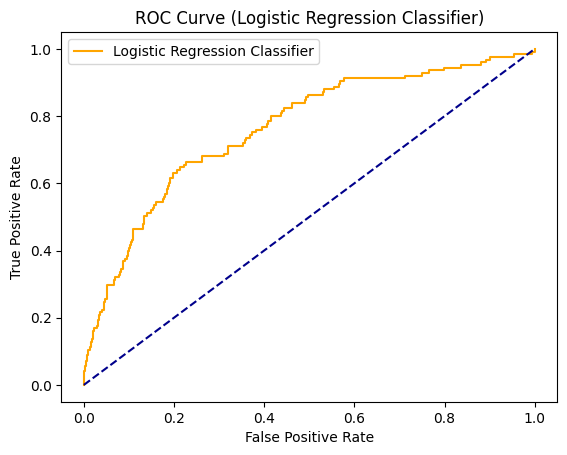

In [86]:
# Logistic Regression classifier
logreg_classifier = LogisticRegression(random_state=42)

# model fitting with training data
logreg_classifier.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_logreg = logreg_classifier.predict(X_test)

# Performance metrics: accuracy, precision, recall, F1 score, ROC-AUC score
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Precision:", precision_score(y_test, y_pred_logreg))
print("Recall:", recall_score(y_test, y_pred_logreg))
print("F1-score:", f1_score(y_test, y_pred_logreg))
print("ROC-AUC Score:", roc_auc_score(y_test, logreg_classifier.predict_proba(X_test)[:, 1]))

# generate classification report
print(classification_report(y_test, y_pred_logreg))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, logreg_classifier.predict_proba(X_test)[:, 1])
#lot
plt.plot(fpr, tpr, color='orange', label='Logistic Regression Classifier')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Logistic Regression Classifier)')
plt.legend()
plt.show()



Accuracy: 69.06%
Precision: 28.05%
Recall: 68.0%
F1-score: 39.72%
ROC-AUC Score: 76.22%

The model's performance is moderate,with higher recall compared to precision, indicating that it captures a good portion of actual churn cases, its precision is relatively low. This suggests that there are a significant number of false positive predictions, which could lead to misidentifying non-churners as churners. Therefore, there is room for improvement in the precision of the model to make more accurate predictions and reduce false positives

## Classification Models Results

In [87]:
#  y_test and y_pred variables are defined for each classifier
# all model classifiers used in modelling
classifiers = ["Gradient Boosting", "Random Forest", "SVM", "Decision Tree", "KNN", "Logistic Regression"]

# performarnce metrics of all models
accuracy = [accuracy_score(y_test, y_pred_gb), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_svm), accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_knn), accuracy_score(y_test, y_pred_logreg)]
precision = [precision_score(y_test, y_pred_gb), precision_score(y_test, y_pred_rf), precision_score(y_test, y_pred_svm), precision_score(y_test, y_pred_dt), precision_score(y_test, y_pred_knn), precision_score(y_test, y_pred_logreg)]
recall = [recall_score(y_test, y_pred_gb), recall_score(y_test, y_pred_rf), recall_score(y_test, y_pred_svm), recall_score(y_test, y_pred_dt), recall_score(y_test, y_pred_knn), recall_score(y_test, y_pred_logreg)]
f1 = [f1_score(y_test, y_pred_gb), f1_score(y_test, y_pred_rf), f1_score(y_test, y_pred_svm), f1_score(y_test, y_pred_dt), f1_score(y_test, y_pred_knn), f1_score(y_test, y_pred_logreg)]

# store results of all models
results = {
    "Classifier": classifiers,
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1
}

# results
results= pd.DataFrame(results)

# sort the model results by F1 score
results= results.sort_values(by="F1-Score", ascending=False)

# show the results of all models
print(results.to_string())


            Classifier  Accuracy  Precision  Recall  F1-Score
0    Gradient Boosting  0.931655   0.761538   0.792  0.776471
1        Random Forest  0.926859   0.780702   0.712  0.744770
3        Decision Tree  0.829736   0.460094   0.784  0.579882
2                  SVM  0.835731   0.459459   0.544  0.498168
5  Logistic Regression  0.690647   0.280528   0.680  0.397196
4                  KNN  0.673861   0.259016   0.632  0.367442


Gradient Boosting and Random Forest classifiers outperform the others in terms of accuracy, precision, recall, and F1-score, indicating their superior predictive models are better suited for identifying potential churners. On the other hand, Logistic Regression and KNN classifiers demonstrate relatively lower performance across all metrics.

## Confusion Matrix

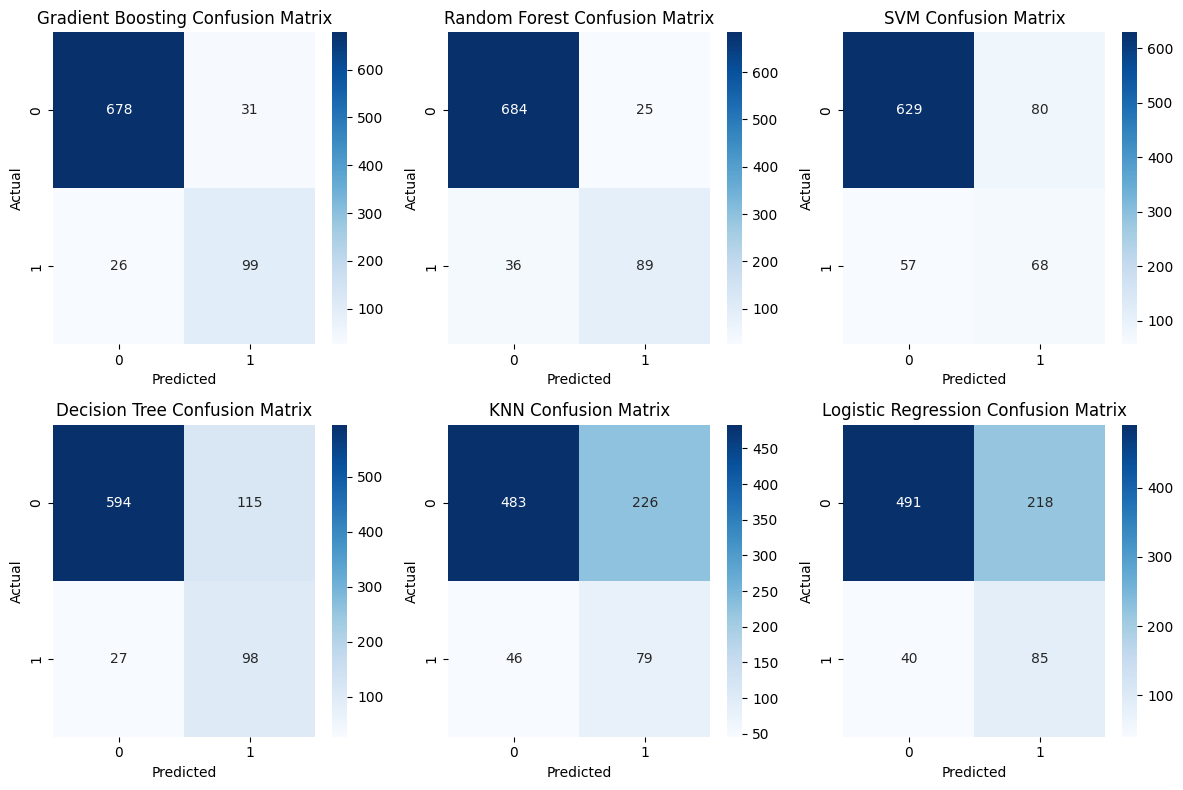

In [88]:

# classifiers lists
classifiers = [gb_classifier, rf_classifier, svm_classifier, dt_classifier, knn_classifier, logreg_classifier]

#  model classifiers
classifier_names = ["Gradient Boosting", "Random Forest", "SVM", "Decision Tree", "KNN", "Logistic Regression"]

# subplots
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# plot confusion matrices
for i, classifier in enumerate(classifiers):
    ax = axes[i // 3, i % 3]
    y_pred = classifier.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", ax=ax, cmap="Blues")
    ax.set_title(f"{classifier_names[i]} Confusion Matrix")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

# plot
plt.tight_layout()
plt.show()


### Hyperparameter Tuning : Model Evaluation
### GridsearchCv




In [89]:
# hyperparameter grid
param_grid = {
    "learning_rate": [0.1, 0.5, 1],
    "n_estimators": [50, 100, 150],
    "max_depth": [3, 4, 5],
}

# GridSearchCV
grid_search = GridSearchCV(gb_classifier, param_grid, cv=5)

# fitting grid search object on training data
grid_search.fit(X_train_resampled, y_train_resampled)

# best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# generate best model
best_gb_model = grid_search.best_estimator_

# perfomance metricsbest model on the test data
y_pred_best_gb = best_gb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_best_gb)
precision = precision_score(y_test, y_pred_best_gb)
recall = recall_score(y_test, y_pred_best_gb)
f1 = f1_score(y_test, y_pred_best_gb)

# print the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Best hyperparameters: {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 150}
Accuracy: 0.9268585131894485
Precision: 0.7758620689655172
Recall: 0.72
F1-Score: 0.7468879668049794


### Random Search

In [90]:
# hyperparameter grid
param_grid = {
    "learning_rate": [0.1, 0.5, 1],
    "n_estimators": [50, 100, 150],
    "max_depth": [3, 4, 5],
}
# RandomizedSearchCV
random_search = RandomizedSearchCV(gb_classifier, param_grid, cv=5, n_iter=10, random_state=42)

# random search on training data
random_search.fit(X_train_resampled, y_train_resampled)

# check best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters:", best_params)

# check best model
best_gb_model = random_search.best_estimator_

# evaluate the best model on the test data
y_pred_best_gb = best_gb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_best_gb)
precision = precision_score(y_test, y_pred_best_gb)
recall = recall_score(y_test, y_pred_best_gb)
f1 = f1_score(y_test, y_pred_best_gb)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Best hyperparameters: {'n_estimators': 150, 'max_depth': 5, 'learning_rate': 0.5}
Accuracy: 0.9268585131894485
Precision: 0.7758620689655172
Recall: 0.72
F1-Score: 0.7468879668049794


Both grid search and random search achieved the same optimal configuration and yielded the same model performance.

## Performance Model Evaluation

Accuracy: 0.9268585131894485
Precision: 0.7758620689655172
Recall: 0.72
F1-score: 0.7468879668049794
ROC-AUC Score: 0.9161523272214388
              precision    recall  f1-score   support

       False       0.95      0.96      0.96       709
        True       0.78      0.72      0.75       125

    accuracy                           0.93       834
   macro avg       0.86      0.84      0.85       834
weighted avg       0.92      0.93      0.93       834



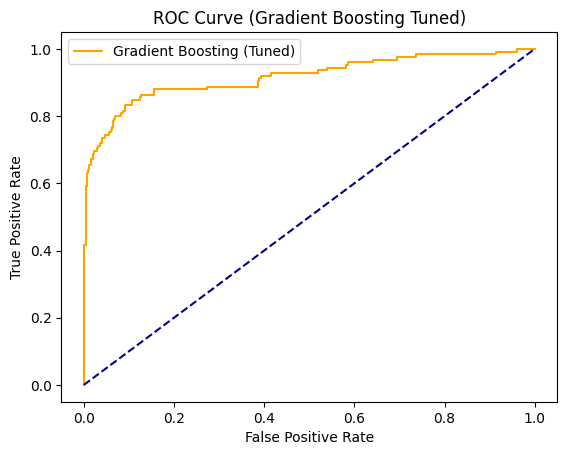

In [91]:

# Performance metrics: accuracy, precision, recall, F1 score, ROC-AUC score
print("Accuracy:", accuracy_score(y_test, y_pred_best_gb))
print("Precision:", precision_score(y_test, y_pred_best_gb))
print("Recall:", recall_score(y_test, y_pred_best_gb))
print("F1-score:", f1_score(y_test, y_pred_best_gb))
print("ROC-AUC Score:", roc_auc_score(y_test, best_gb_model.predict_proba(X_test)[:, 1]))

# generate classification report
print(classification_report(y_test, y_pred_best_gb))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, best_gb_model.predict_proba(X_test)[:, 1])
# plot
plt.plot(fpr, tpr, color='orange', label='Gradient Boosting (Tuned)')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Gradient Boosting Tuned)')
plt.legend()
plt.show()


### Further Model Evaluation

Accuracy: 0.9460431654676259
Precision: 0.8921568627450981
Recall: 0.728
F1-score: 0.8017621145374448
ROC-AUC Score: 0.9325133991537377


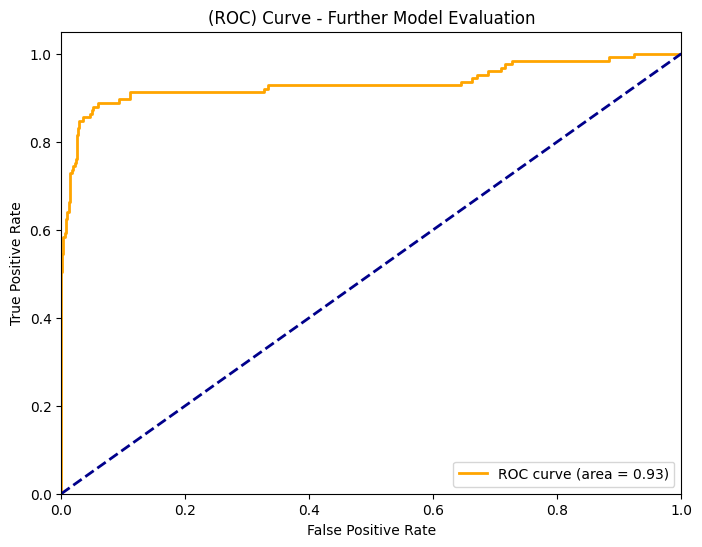

In [104]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

# Split the data into training and testing sets with a 75-25 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Fit the best Gradient Boosting model on the training data
best_gb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_best_gb = best_gb_model.predict(X_test)

# Calculate the performance metrics
accuracy = accuracy_score(y_test, y_pred_best_gb)
precision = precision_score(y_test, y_pred_best_gb)
recall = recall_score(y_test, y_pred_best_gb)
f1 = f1_score(y_test, y_pred_best_gb)
roc_auc = roc_auc_score(y_test, best_gb_model.predict_proba(X_test)[:, 1])

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC Score:", roc_auc)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
fpr, tpr, thresholds = roc_curve(y_test, best_gb_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkblue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve - Further Model Evaluation')
plt.legend(loc="lower right")
plt.show()


### Cross Validation

In [95]:
# cross-validation with the gradient boost classifier model
scores = cross_val_score(best_gb_model, X_train_resampled, y_train_resampled, cv=5)

# average accuracy
print("Average accuracy:", scores.mean())

# standard deviation of the accuracy
print("Standard deviation:", scores.std())



Average accuracy: 0.9420893357615677
Standard deviation: 0.016627495117028476
Average accuracy: 0.9420893357615677
Standard deviation: 0.016627495117028476


### Separate Test Validation

Accuracy: 0.9460431654676259
Precision: 0.8921568627450981
Recall: 0.728
F1-score: 0.8017621145374448
ROC-AUC Score: 0.9325133991537377


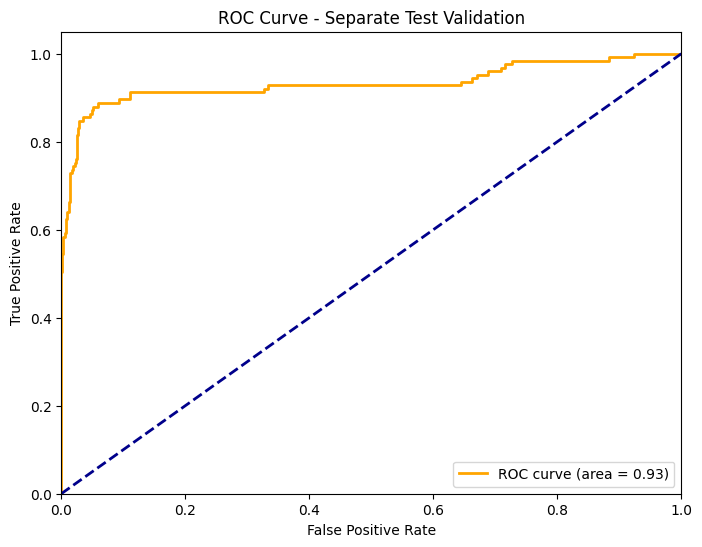

In [102]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# model training on the training set
best_gb_model.fit(X_train, y_train)

# model evaluation on the test set
y_pred_test = best_gb_model.predict(X_test)
# roc curve
fpr, tpr, thresholds = roc_curve(y_test, best_gb_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

#  model perfomance
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Precision:", precision_score(y_test, y_pred_test))
print("Recall:", recall_score(y_test, y_pred_test))
print("F1-score:", f1_score(y_test, y_pred_test))
print("ROC-AUC Score:", roc_auc)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkblue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Separate Test Validation')
plt.legend(loc="lower right")
plt.show()


## Conclusion & Recommendation

**Enhance Customer Engagement**: Implement strategies to enhance customer engagement and satisfaction, such as personalized communication, proactive customer support, and loyalty programs. By fostering stronger relationships with customers, the likelihood of churn may decrease as customers feel valued and supported.

**Target Retention Campaigns**: Utilize insights from the churn prediction model to develop targeted retention campaigns aimed at at-risk customers. These campaigns can include special offers, discounts, or incentives tailored to address the specific needs or concerns of customers identified as likely to churn.

**Improve Service Quality:** Focus on improving service quality and addressing common pain points identified through customer feedback and analysis. By addressing issues related to service reliability, call quality, and customer support, SyriaTel can enhance overall customer satisfaction and loyalty, reducing the likelihood of churn.

**Proactive Customer Service**: Implement proactive customer service initiatives to address potential churn triggers before they escalate. This may involve monitoring customer behavior and engagement metrics to identify early warning signs of dissatisfaction and intervene accordingly with personalized support or solutions.

**Data-Driven Decision Making**: Continuously monitor and analyze customer data to identify trends, patterns, and factors contributing to churn. Regularly update and refine the churn prediction model based on new insights and evolving customer behavior to ensure its accuracy and effectiveness in predicting churn.

**Cross-Functional Collaboration**: Foster collaboration across departments, including marketing, sales, customer service, and data analytics, to align strategies and initiatives aimed at reducing churn. By leveraging collective expertise and resources, SyriaTel can implement cohesive and holistic approaches to customer retention.

**Customer Feedback Mechanisms**: Implement robust mechanisms for gathering and analyzing customer feedback to understand their needs, preferences, and pain points. Actively solicit feedback through surveys, reviews, and other channels, and use this information to drive continuous improvement efforts and enhance the customer experience.



### Possible Factors influencing Customer Churning

**Service Quality **- Customers may churn if they experience frequent service disruptions, poor call quality, slow internet speeds, or other service-related issues. Monitoring service performance metrics and addressing any issues promptly can help retain customers.

**Competitive Pricing** - Customers may switch to competitors offering better pricing plans, discounts, or promotional offers. Conducting market research and adjusting pricing strategies to remain competitive can help prevent customer attrition due to pricing factors.

**Customer Support** -  Dissatisfaction with customer service interactions, long wait times, or unresolved complaints can drive customers to churn. Improving the responsiveness and effectiveness of customer support channels can enhance customer satisfaction and loyalty.

**Billing and Payment Issues** - Billing errors, unexpected charges, or difficulty in managing account payments can frustrate customers and lead them to consider switching providers. Streamlining billing processes and offering flexible payment options can reduce churn related to billing issues.

**Service Offerings**- Customers may churn if they find better service offerings or features elsewhere, such as unlimited data plans, international calling options, or value-added services. Continuously innovating and expanding service offerings to meet evolving customer needs can help retain customers.

**Customer Experience**- Negative experiences across touchpoints, including website usability, mobile app functionality, and store interactions, can influence customers' decisions to churn. Investing in enhancing the overall customer experience can improve satisfaction and reduce churn.